In [1]:
import numpy as np
import pandas as pd

In [2]:
LOGIN_LENGTH = 14
PASSWORD_LENGTH = 13
TOTAL_LENGTH = PASSWORD_LENGTH + LOGIN_LENGTH
TOTAL_EXAMPLES = 20
LEGAL_EXAMPLES = 10
ILLEGAL_EXAMPLES = 10

legal_login_deltas = np.zeros((LEGAL_EXAMPLES, LOGIN_LENGTH))
legal_password_deltas = np.zeros((LEGAL_EXAMPLES, PASSWORD_LENGTH))
illegal_login_deltas = np.zeros((ILLEGAL_EXAMPLES, LOGIN_LENGTH))
illegal_password_deltas = np.zeros((ILLEGAL_EXAMPLES, PASSWORD_LENGTH))

def read_array(field, arr, file, symbol_nums):
    with open(file, "r") as f:
        i = 0
        for line in f:
            if field in line:
                next(f)
                s = next(f)
                for j in range(symbol_nums):
                    arr[i][j] = s.split()[2][:-1]
                    s = next(f)
                i += 1

read_array("Login", legal_login_deltas, "legal.txt", LOGIN_LENGTH)
read_array("Password", legal_password_deltas, "legal.txt", PASSWORD_LENGTH)
params = np.hstack((legal_login_deltas, legal_password_deltas))

read_array("Login", illegal_login_deltas, "illegal.txt", LOGIN_LENGTH)
read_array("Password", illegal_password_deltas, "illegal.txt", PASSWORD_LENGTH)
params = np.vstack((params, np.hstack((illegal_login_deltas, illegal_password_deltas))))

results = np.vstack((np.ones((LEGAL_EXAMPLES,1), dtype=int), np.zeros((ILLEGAL_EXAMPLES,1), dtype=int)))
data = np.hstack((params, results))
df = pd.DataFrame(data)

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,20.000000,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,184.900000,321.600000,167.200000,347.55000,311.50000,198.100000,327.150000,159.450000,223.550000,165.900000,...,609.800000,625.300000,643.450000,825.70000,610.400000,682.100000,408.700000,494.25000,123.650000,0.500000
std,197.445236,424.324528,117.859685,241.44139,325.02672,75.574223,345.685174,46.421949,180.452202,118.854577,...,502.599307,403.440219,306.333062,442.43276,358.477541,338.959383,395.662283,166.87653,45.631562,0.512989
min,69.000000,55.000000,71.000000,175.00000,88.00000,83.000000,66.000000,108.000000,114.000000,51.000000,...,175.000000,284.000000,328.000000,376.00000,250.000000,337.000000,67.000000,215.00000,75.000000,0.000000
25%,86.000000,85.000000,110.500000,188.75000,116.50000,142.250000,93.250000,127.750000,135.500000,97.000000,...,213.750000,311.750000,402.750000,468.50000,266.750000,429.500000,143.750000,394.25000,95.500000,0.000000
50%,97.000000,149.000000,125.000000,221.50000,145.50000,192.000000,107.500000,150.500000,141.500000,116.500000,...,388.500000,424.000000,476.500000,614.50000,563.500000,493.500000,233.000000,497.00000,106.000000,0.500000
75%,146.000000,313.500000,151.000000,410.25000,322.50000,230.250000,516.500000,173.500000,172.000000,195.500000,...,813.750000,849.000000,842.250000,1097.75000,840.000000,916.000000,557.000000,599.75000,147.500000,1.000000
max,689.000000,1719.000000,532.000000,871.00000,1040.00000,406.000000,1018.000000,278.000000,764.000000,555.000000,...,1702.000000,1566.000000,1389.000000,1599.00000,1303.000000,1445.000000,1409.000000,828.00000,239.000000,1.000000


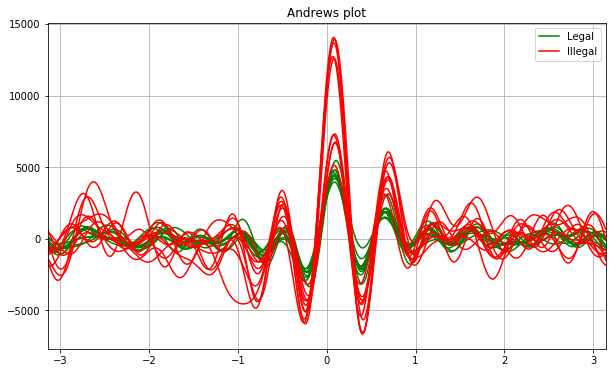

In [5]:
from math import ceil
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

def andrews_curve(arr, theta, arr_size):
    curve = list()
    for th in theta:
        fourier_series = []
        fourier_series.append(arr[0] / np.sqrt(2))
        for i in range(1, arr_size):
            j = ceil(i / 2)
            fourier_series.append(arr[i] * np.sin(j*th) if i % 2 == 1 else arr[i] * np.cos(j*th))

        curve.append(sum(fourier_series))
        
    return curve

def plot_andrews_curve(data, plot_title, accuracy=1000, 
                       params_number=TOTAL_LENGTH, 
                       plot_dpi=1000):
    theta = np.linspace(-np.pi, np.pi, accuracy)

    plt.plot(theta, andrews_curve(data[0:1][0], theta, params_number), 'g', label="Legal")
    for s in data[1:LEGAL_EXAMPLES]:
        plt.plot(theta, andrews_curve(s, theta, params_number), 'g')

    plt.plot(theta, andrews_curve(data[LEGAL_EXAMPLES:LEGAL_EXAMPLES + 1][0], theta, params_number),
             'r', label="Illegal")
    for s in data[LEGAL_EXAMPLES + 1:LEGAL_EXAMPLES + ILLEGAL_EXAMPLES]:
        plt.plot(theta, andrews_curve(s ,theta, params_number), 'r')

    plt.xlim(-np.pi,np.pi)
    plt.legend()
    plt.title(plot_title)
    plt.grid()
    plt.savefig(plot_title.replace(' ', '_'), dpi=plot_dpi)
    plt.show()

plot_andrews_curve(data, "Andrews plot")

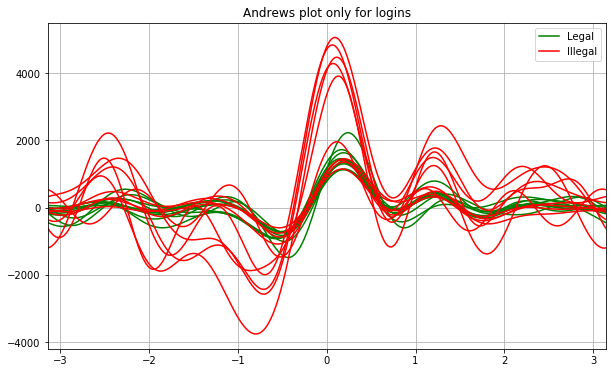

In [6]:
login_data = np.hstack((data[:, :LOGIN_LENGTH], data[:,TOTAL_LENGTH:TOTAL_LENGTH + 1]))
plot_andrews_curve(login_data, "Andrews plot only for logins", params_number=LOGIN_LENGTH)

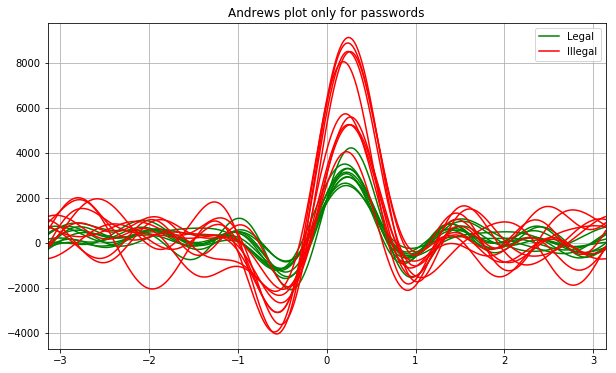

In [7]:
password_data = np.hstack((data[:, LOGIN_LENGTH:TOTAL_LENGTH], data[:,TOTAL_LENGTH:TOTAL_LENGTH + 1]))
plot_andrews_curve(password_data, "Andrews plot only for passwords", params_number=PASSWORD_LENGTH)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 10
y = df[27]
df.drop([27], axis=1, inplace=True)

# 25% - под тестовую выборку
x_train, x_test, y_train, y_test = train_test_split(df.values, y, test_size=0.25)

In [ ]:
# метод k ближайших соседей
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_jobs=-1))])

# подбор числа соседей и метрики расстояния
knn_params = {'knn__n_neighbors': range(1, 7), 'knn__metric': ['euclidean', 'manhattan', 'minkowski']}
# кросс-валидация
knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=8, n_jobs=-1,
                        verbose=True)

knn_grid.fit(x_train, y_train)

In [8]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__metric': 'euclidean', 'knn__n_neighbors': 1}, 0.9333333333333333)

In [9]:
accuracy_score(y_test, knn_grid.predict(x_test))

1.0

In [ ]:
# решающее дерево
tree = DecisionTreeClassifier(max_depth=10, random_state=RANDOM_SEED)
# подбор максимальной глубины, максимального числа признаков и функции измерения качества разбиения
tree_params = {'max_depth': range(1,15),
               'max_features': range(5,27),
               'criterion': ['entropy', 'gini']}
# кросс-валидация
tree_grid = GridSearchCV(tree, tree_params,
                         cv=8, n_jobs=-1,
                         verbose=True)
tree_grid.fit(x_train, y_train)

In [5]:
tree_grid.best_params_, tree_grid.best_score_

({'criterion': 'entropy', 'max_depth': 1, 'max_features': 5}, 1.0)

In [6]:
accuracy_score(y_test, tree_grid.predict(x_test))

1.0

In [53]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, max_features=5, random_state=RANDOM_SEED)
tree.fit(x_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file='result_tree.dot', filled=True)
!dot -Tpng result_tree.dot -o result_tree.png
!rm result_tree.dot

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=RANDOM_SEED)

In [13]:
forest_params = {'max_depth': range(1,20),
                 'max_features': range(15,27),
                 'n_estimators': range(15,25)}
forest_grid = GridSearchCV(forest, forest_params,
                         cv=6, n_jobs=-1,
                         verbose=True)
forest_grid.fit(x_train, y_train)

Fitting 6 folds for each of 2280 candidates, totalling 13680 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed:  9

GridSearchCV(cv=6, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 20), 'n_estimators': range(15, 25), 'max_features': range(15, 27)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [15]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 1, 'max_features': 16, 'n_estimators': 20}, 0.9333333333333333)

In [16]:
accuracy_score(y_test, forest_grid.predict(x_test))

1.0

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

In [20]:
polynomials = PolynomialFeatures(degree=3)
params_polynomials = polynomials.fit_transform(x_train)

In [ ]:
# логистическая прогрессия
logist_regr = LogisticRegression(C=1, n_jobs=-1, random_state=RANDOM_SEED)
logist_regr.fit(params_polynomials, y_train)

In [22]:
logist_regr.score(params_polynomials, y_train)

1.0

In [48]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
c_values = np.logspace(2, 4, 500)

# нахождение оптимального параметра регуляризации С
logist_regr_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logist_regr_searcher.fit(params_polynomials, y_train)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   29.5s remaining:   44.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.0s finished


LogisticRegressionCV(Cs=array([  100.     ,   100.92715, ...,  9908.13657, 10000.     ]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=-1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=1)

In [49]:
logist_regr_searcher.C_

array([160.10644613])

In [50]:
polynomials = PolynomialFeatures(degree=3)
params_polynomials = polynomials.fit_transform(x_test)
logist_regr_searcher.score(params_polynomials, y_test)


1.0